# 🛒 Online Shoppers Purchasing Intention Prediction using Machine Learning


# Introduction

In the competitive world of e-commerce, understanding customer behavior is essential to improve sales. This project aims to build a machine learning model that predicts whether an online shopper will make a purchase based on their session behavior, technical features, and other browsing patterns.

By leveraging this predictive model, businesses can optimize marketing efforts, personalize experiences, and reduce cart abandonment.


# Objective

To build a machine learning model that predicts whether an online shopper will make 
a purchase  based on their browsing behavior, session attributes, and technical features.

 # Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

# Loading Dataset

In [2]:
# load dataset
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Dataset successfully loaded. Let's now explore the structure and understand the types of features included.


# Data Exploration and Data Cleaning

## Basic Dataset info

In [3]:
# To know columns
print("columns: \n",df.columns)

# displays top 20 raws
print("Top 20 rows",df.head(20))

# To know basic onformation about dataset
df.info() 

# to know number of rows and culumns
print("\n shape :\n",df.shape)  

# statistical analysis of numerical features
print("Statistical analysis",df.describe() )           

columns: 
 Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
Top 20 rows     Administrative  Administrative_Duration  Informational  \
0                0                      0.0              0   
1                0                      0.0              0   
2                0                      0.0              0   
3                0                      0.0              0   
4                0                      0.0              0   
5                0                      0.0              0   
6                0                      0.0              0   
7                1                      0.0              0   
8                0                      0.0              0   
9       

## Data Cleaning

The 'OperatingSystems'and  'Browser' columns have low impact on predicting output variable

In [4]:
# Dropping Less Informative Features
df = df.drop(columns = ['Browser', 'OperatingSystems'])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,3,11,Returning_Visitor,False,False


In [5]:
# checking for null values in columns
df.isnull().sum()  

# there is no null values in  columns
# df.dropna()     droping null values if any

# checking for duplicated rows
print("Number of duplicated rows :",df.duplicated().sum())         # returns total number of duplicated rows


Number of duplicated rows : 251


Out of 12,330 total rows, only 126 rows were identified as duplicates.The number of duplicated rows is relatively small, indicating that the dataset has minimal redundancy.so we can drop duplicates

In [6]:
# Droping duplicated rows
df = df.drop_duplicates()
df.shape
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,3,11,Returning_Visitor,False,False


## Encoding

In [66]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object' ]).columns.tolist()
print("Categorical columns:", categorical_cols)

# Apply one-hot encoding to nominal categorical columns
df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)

Categorical columns: ['Month', 'VisitorType']


Two boolean columns: Weekend and Revenue.Since both columns represent binary outcomes (True/False), they were converted to numerical form (1/0) using simple type casting. No additional encoding was required.


In [67]:
# Convert boolean columns to integers (0 and 1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.038666,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.038666,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.038666,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.038666,0.086667,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [68]:
# checking value of column 
for col in df.columns:
   print("Unique values in ",f'{col}', df[col].unique())


Unique values in  Administrative [ 0  1  2  4 10  3  6  5  9  8  7]
Unique values in  Administrative_Duration [  0.         53.         64.6       ... 181.8666667 167.9107143
 150.3571429]
Unique values in  Informational [0]
Unique values in  Informational_Duration [0.]
Unique values in  ProductRelated [ 1  2 10 19  0  3 16  7  6 23 13 20  8  5 32  4 45 14 52  9 46 15 22 11
 12 36 42 27 83 18 38 17 25 30 21 51 26 28 31 24 50 49 68 67 55 35 37 29
 34 71 63 40 33 54 64 75 39 81 61 47 44 41 79 66 43 80 62 48 58 57 56 69
 82 59 53 78 65 60 77 74 76 72 73 70]
Unique values in  ProductRelated_Duration [  0.          64.           2.66666667 ... 465.75       184.25
 346.        ]
Unique values in  BounceRates [0.03866647 0.         0.02       ... 0.00382775 0.00086956 0.01114899]
Unique values in  ExitRates [0.09561404 0.05       0.0245614  ... 0.01276133 0.01395349 0.02903061]
Unique values in  PageValues [0.]
Unique values in  SpecialDay [0.  0.4 0.8 1.  0.2 0.6]
Unique values in  Region [1

##  Visualizations to Explore the Dataset

C:\Users\prave\AppData\Local\Temp\ipykernel_25668\4032187236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=df, palette='Set2')


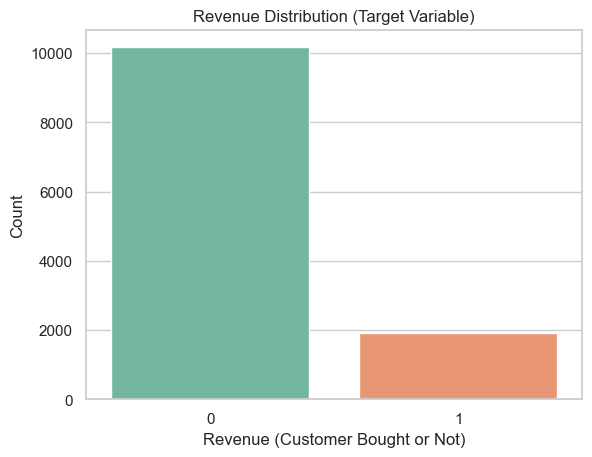

In [69]:
 # Distribution of Target Variable
sns.countplot(x='Revenue', data=df, palette='Set2')
plt.title('Revenue Distribution (Target Variable)')
plt.xlabel('Revenue (Customer Bought or Not)')
plt.ylabel('Count')
plt.show()

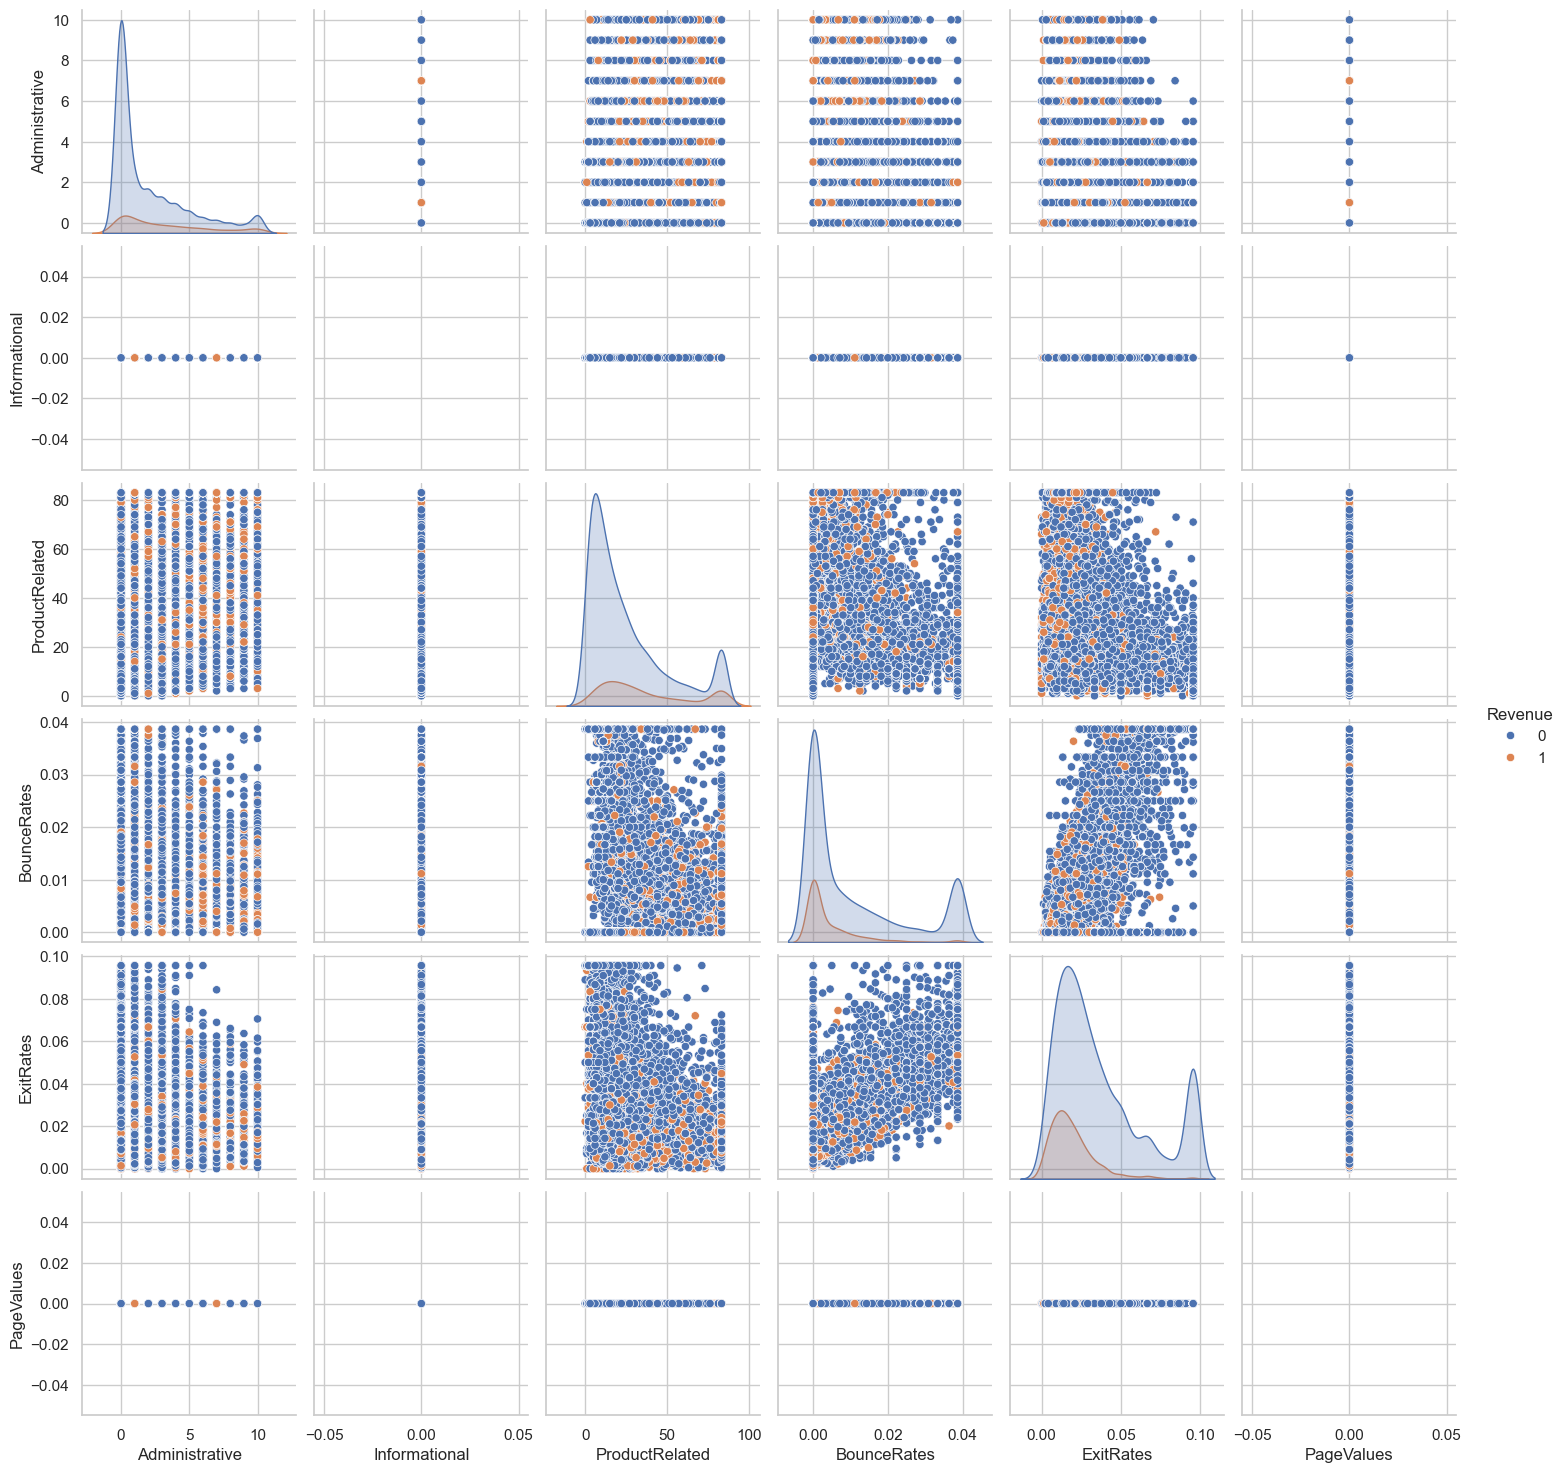

In [70]:
# Pairplot of Key Features vs Revenue
sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues', 'Revenue']], hue='Revenue')
plt.show()


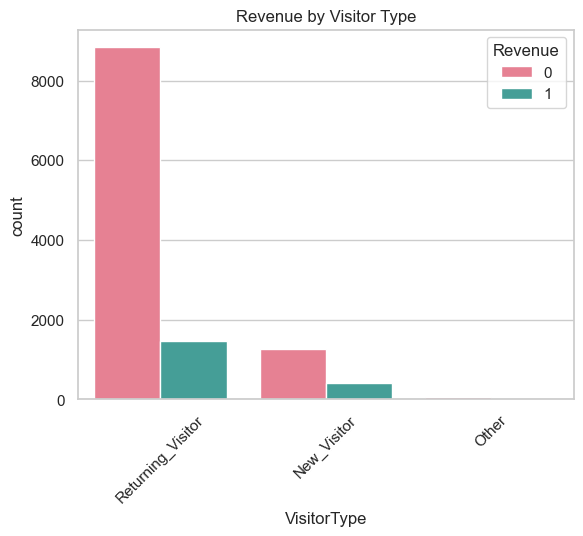

In [60]:
# Revenue By Visitor Type
sns.countplot(x='VisitorType', hue='Revenue', data=df, palette='husl')
plt.title('Revenue by Visitor Type')
plt.xticks(rotation=45)
plt.show()

## Outlier detection and Handling

We can use boxplots to visually detect outliers in significant numerical column of a DataFrame. 

In [9]:
df_copy = df.copy()   # create  a copy of dataframe


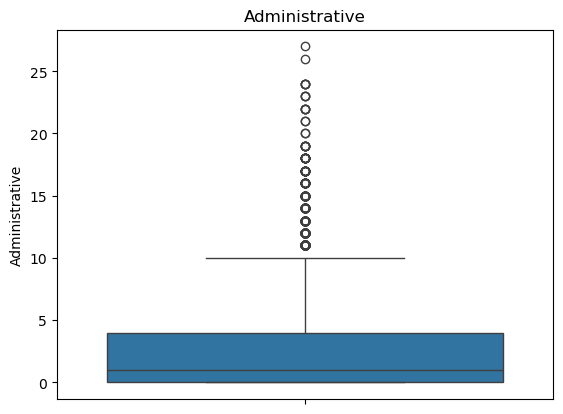

*------------------------------------------------------------------------------------------*


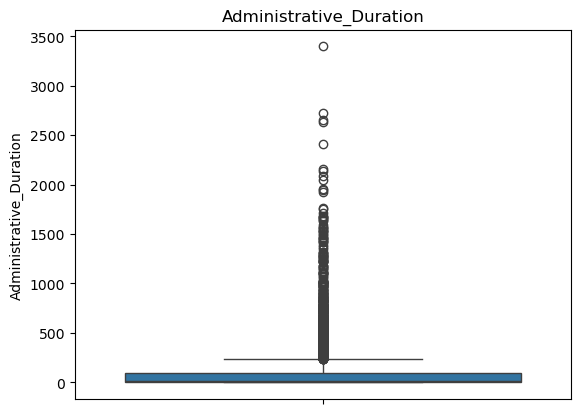

*------------------------------------------------------------------------------------------*


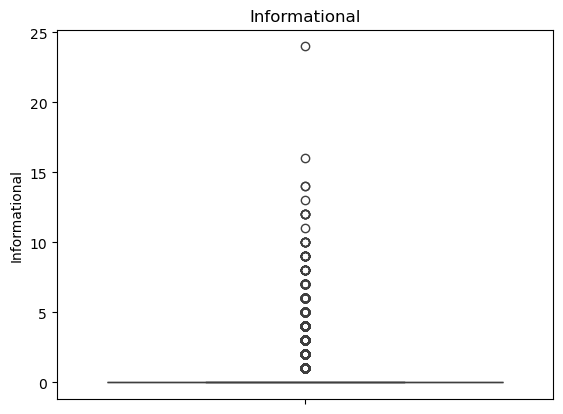

*------------------------------------------------------------------------------------------*


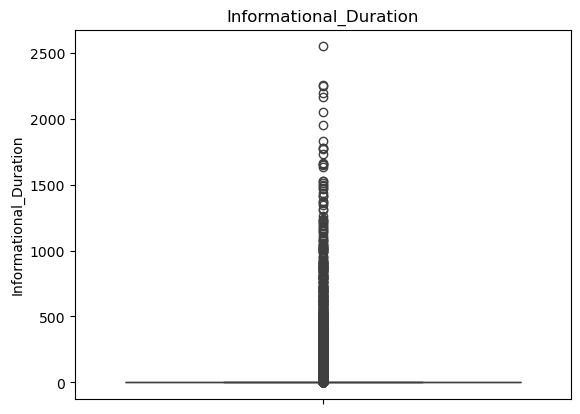

*------------------------------------------------------------------------------------------*


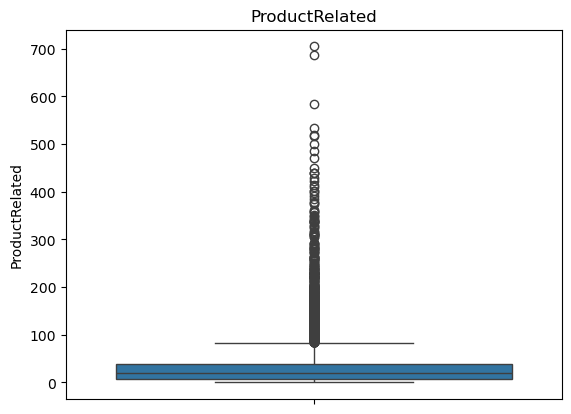

*------------------------------------------------------------------------------------------*


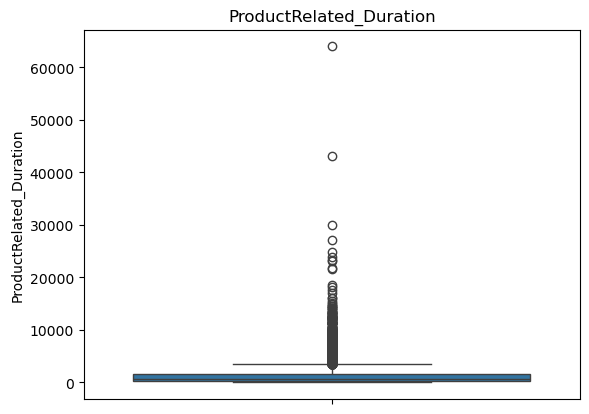

*------------------------------------------------------------------------------------------*


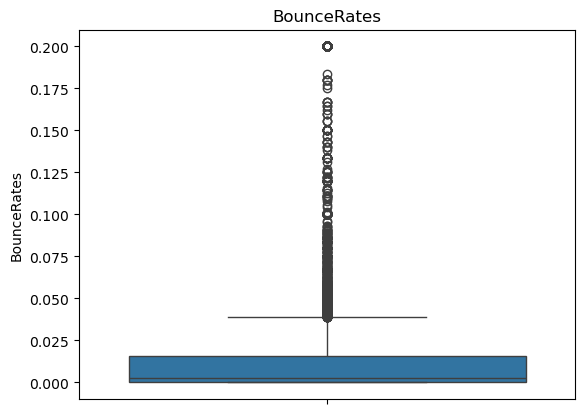

*------------------------------------------------------------------------------------------*


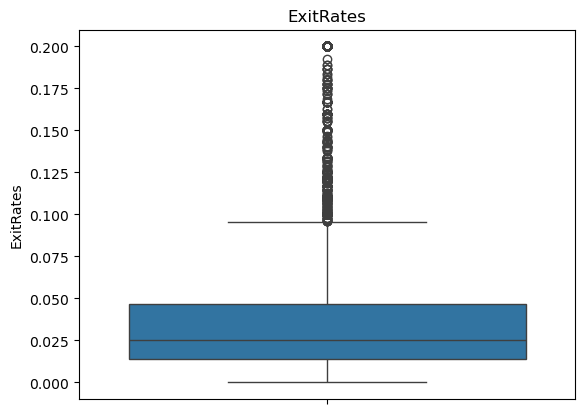

*------------------------------------------------------------------------------------------*


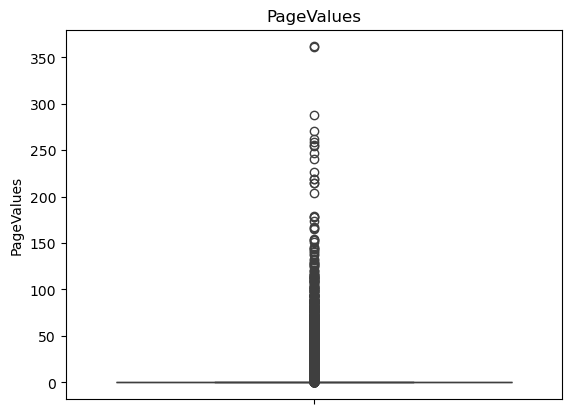

*------------------------------------------------------------------------------------------*


In [10]:
# for these columns we can use for loop to plot boxplot
columns = ['Administrative','Administrative_Duration','Informational','Informational_Duration',	'ProductRelated','ProductRelated_Duration',	'BounceRates','ExitRates','PageValues']
for col in columns:
    sns.boxplot(data = df, y=col)
    plt.title(f'{col}')
    plt.show()
    print("*------------------------------------------------------------------------------------------*")


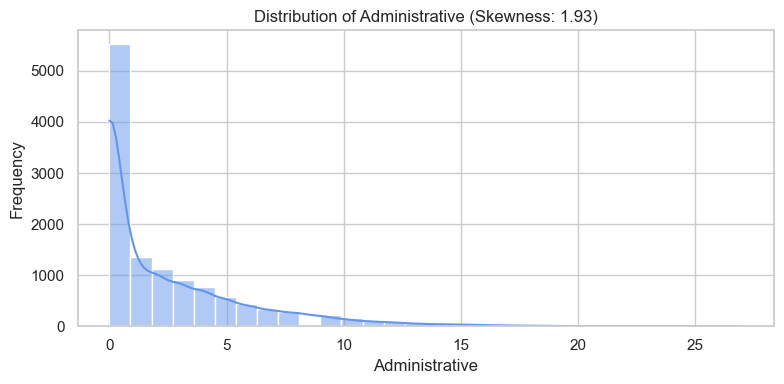

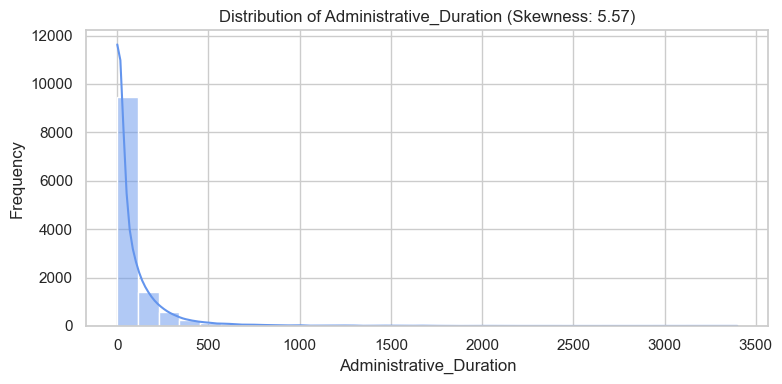

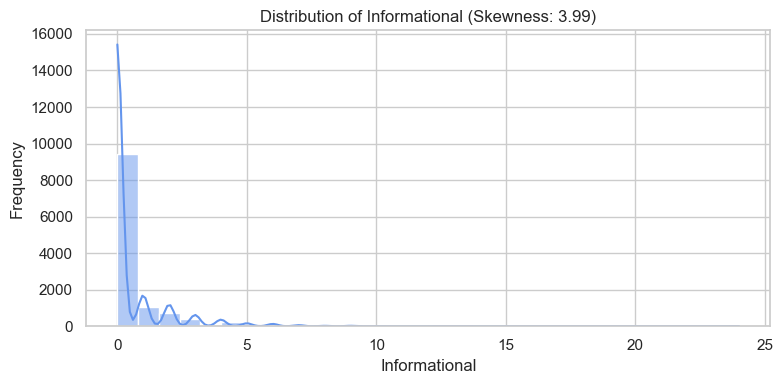

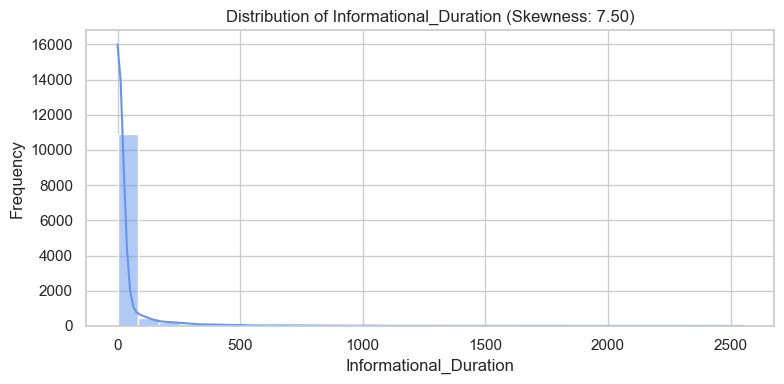

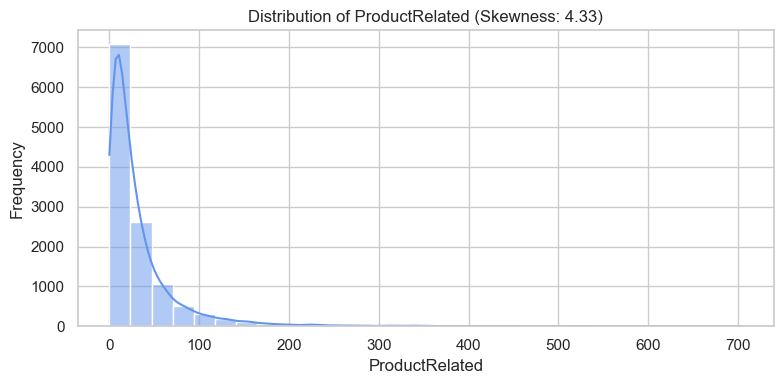

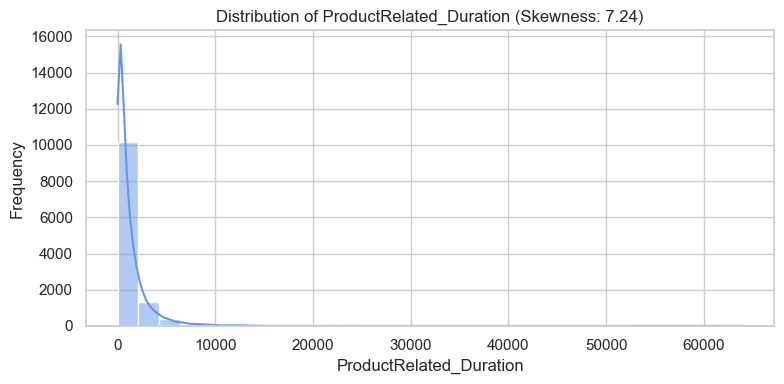

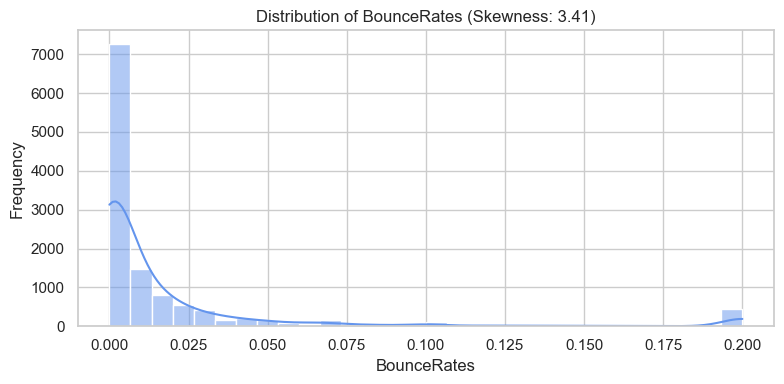

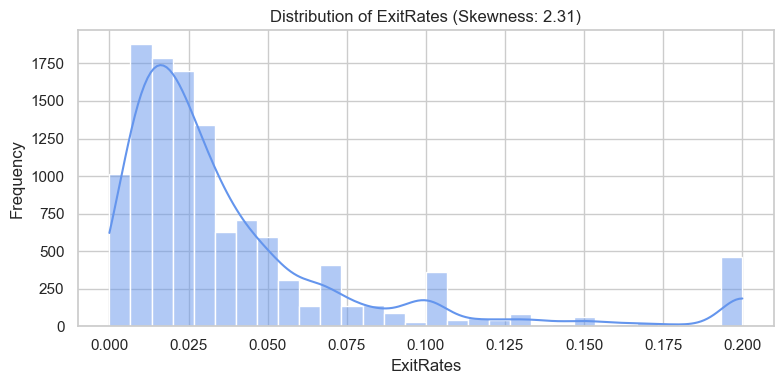

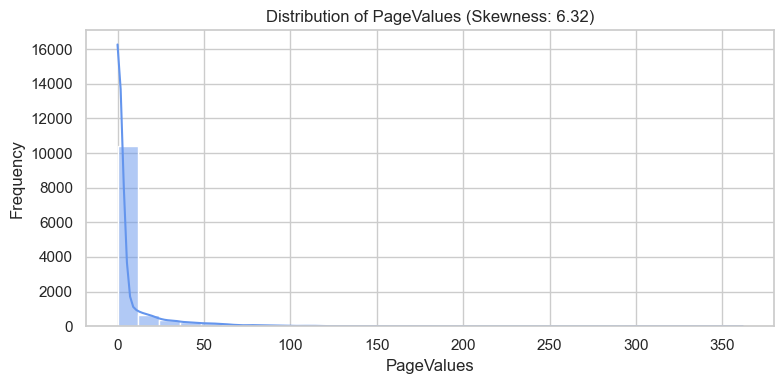

In [44]:
# Calculate skewness for each numerical column

# Dictionary to store skewness values
skewness_dict = {}

# Loop through each column and calculate skewness
for col in columns:
    skew_val = skew(df[col])  # Ensure NaNs are excluded
    skewness_dict[col] = skew_val
# Set plot style
sns.set(style="whitegrid")

# Loop through each column and plot histplot
for col in columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, color='cornflowerblue', bins=30)
    plt.title(f'Distribution of {col} (Skewness: {df[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



from the above histplot it is clear that there is no column with normal distribution no need to use z score for outlier detection

We can use IQR methods to find outliers for above columns.Defining a class to find ouliers using IQR method and handling outliers
Defining two functions called capping() and trimming()inside the class, which will perform capping and trimming operations respectivly on outlier data.
Depending on outlier size we can call them.Each function will returns a dataframe after performing  trimming or capping.
We can also use imputation or transformation method here using capping and trimming

In [54]:
# Defining a class to find ouliers using IQR method and handling outliers

class OutlierHandling:
    def __init__(self, df):
        self.df = df
        
    # Defining a function to find ouliers using IQR method   
    def IQR(self, column):
        Q1 = self.df[column].quantile(0.25)   #   setting 25 th 	Percentile as Q1
        Q3 = self.df[column].quantile(0.75)    # 75th 	Percentile as Q3
    
        iqr = Q3 - Q1
    
        self.lb = Q1 - 1.5*iqr       # finding lower bound
        self.ub = Q3 + 1.5*iqr       # finding upper bound
    
        outliers = self.df[ (self.df[column] < self.lb ) | (self.df[column] > self.ub) ]

        # Print outliers
        print(f"\nOutliers in '{column}' based on IQR method:")
        print(outliers[[column]])  

    
    # Defining a function for capping
    def capping(self,column):
        self.df[column] = self.df[column].clip(lower = self.lb, upper =self.ub)

    
    # Function for trimming
    def trimming(self,column):
        trimmed_df = self.df[ (self.df[column] < self.lb) & (self.df[column] > self.ub) ]




In [55]:
# creating instance of class
handler = OutlierHandling(df)

for col in columns:
    handler.IQR(col)
    handler.capping(col)


Outliers in 'Administrative' based on IQR method:
       Administrative
62                 12
248                16
282                13
288                11
478                13
...               ...
12209              12
12221              12
12233              13
12236              12
12244              19

[404 rows x 1 columns]

Outliers in 'Administrative_Duration' based on IQR method:
       Administrative_Duration
62                  279.416667
76                 1005.666667
109                 326.250000
128                 462.000000
187                 293.778205
...                        ...
12247               311.136111
12260               262.666667
12265               413.499612
12285               369.333333
12307               305.125000

[1123 rows x 1 columns]

Outliers in 'Informational' based on IQR method:
       Informational
29                 1
57                 2
98                 1
103                1
106                1
...              ...
12307  

C:\Users\prave\AppData\Local\Temp\ipykernel_25668\1870586706.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column] = self.df[column].clip(lower = self.lb, upper =self.ub)
C:\Users\prave\AppData\Local\Temp\ipykernel_25668\1870586706.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column] = self.df[column].clip(lower = self.lb, upper =self.ub)
C:\Users\prave\AppData\Local\Temp\ipykernel_25668\1870586706.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic


Outliers in 'ProductRelated' based on IQR method:
       ProductRelated
66                 90
109               128
187                96
195                98
288                87
...               ...
12285             133
12287             111
12311             144
12312             221
12317              95

[1007 rows x 1 columns]

Outliers in 'ProductRelated_Duration' based on IQR method:
       ProductRelated_Duration
40                 4084.393939
66                 6951.972222
109                5062.213753
195                3556.612410
251                5188.500000
...                        ...
12285              3918.363736
12287              6340.152381
12308              4018.450000
12311              4627.489571
12312             11431.001240

[937 rows x 1 columns]

Outliers in 'BounceRates' based on IQR method:
       BounceRates
0         0.200000
2         0.200000
3         0.050000
6         0.200000
7         0.200000
...            ...
12290     0.080000
1229

C:\Users\prave\AppData\Local\Temp\ipykernel_25668\1870586706.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column] = self.df[column].clip(lower = self.lb, upper =self.ub)
C:\Users\prave\AppData\Local\Temp\ipykernel_25668\1870586706.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column] = self.df[column].clip(lower = self.lb, upper =self.ub)
C:\Users\prave\AppData\Local\Temp\ipykernel_25668\1870586706.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

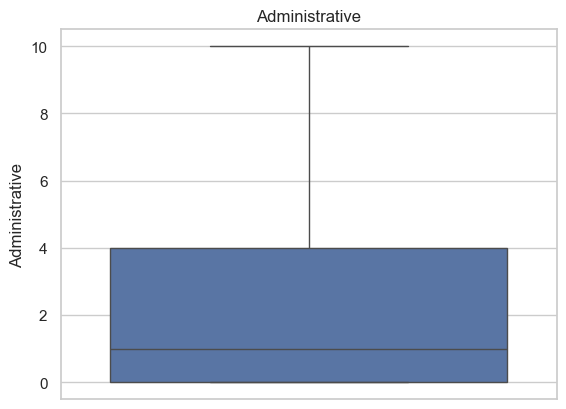

*------------------------------------------------------------------------------------------*


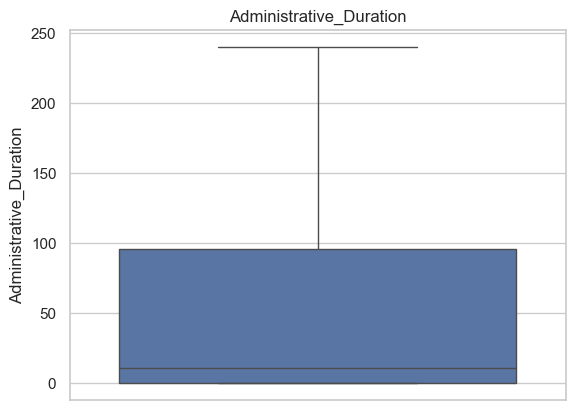

*------------------------------------------------------------------------------------------*


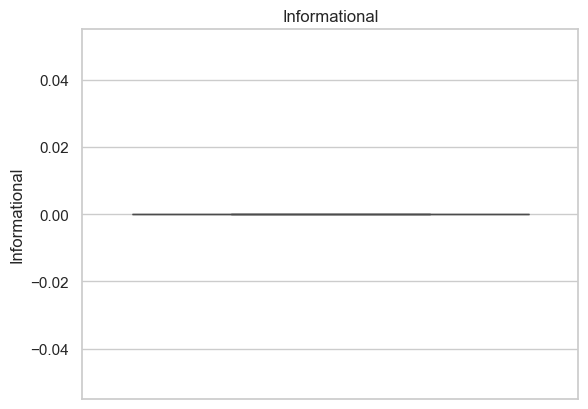

*------------------------------------------------------------------------------------------*


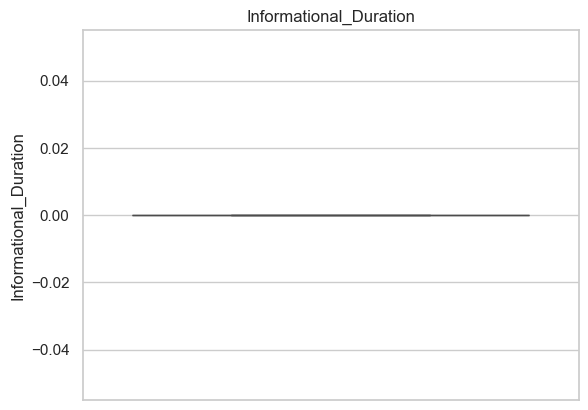

*------------------------------------------------------------------------------------------*


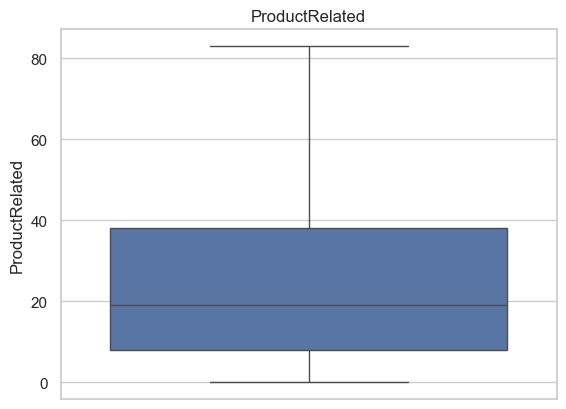

*------------------------------------------------------------------------------------------*


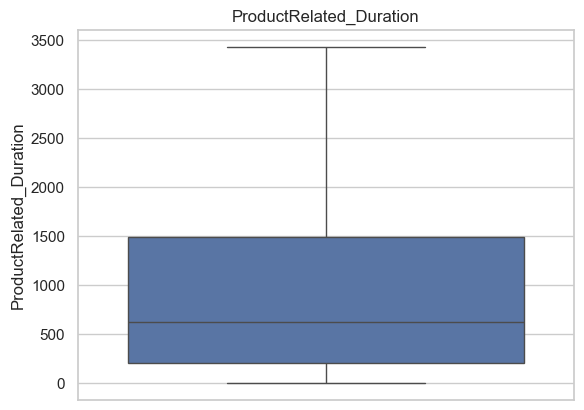

*------------------------------------------------------------------------------------------*


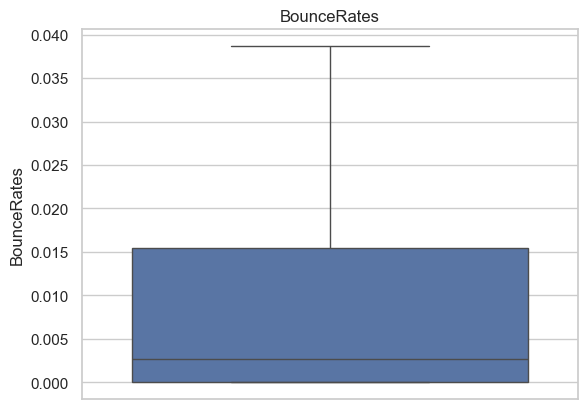

*------------------------------------------------------------------------------------------*


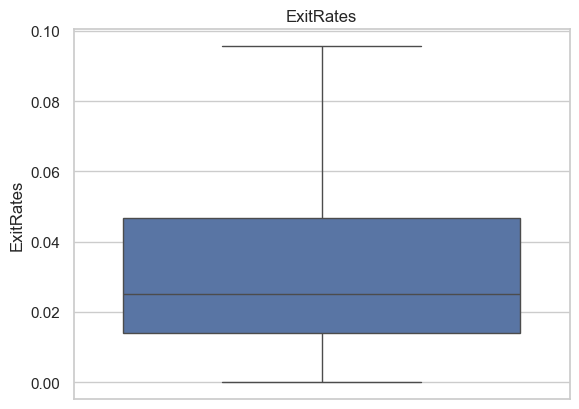

*------------------------------------------------------------------------------------------*


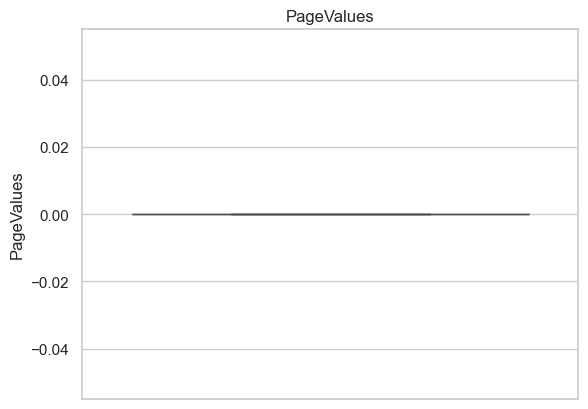

*------------------------------------------------------------------------------------------*


In [57]:
# plotting boxplot after handling outliers
for col in columns:
    sns.boxplot(data = df, y=col)
    plt.title(f'{col}')
    plt.show()
    print("*------------------------------------------------------------------------------------------*")


In [62]:
df_cleaned = df.copy()
df_cleaned

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.038666,0.095614,0.0,0.0,Feb,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.095614,0.0,0.0,Feb,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.038666,0.095614,0.0,0.0,Feb,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.038666,0.095614,0.0,0.0,Feb,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,0.0,0.0,Dec,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.0,0.0,Nov,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.038666,0.086667,0.0,0.0,Nov,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.0,0.0,Nov,3,11,Returning_Visitor,0,0


##  Training Testing Split 

In [72]:
# Input (X): All columns except 'Revenue'
X = df.drop('Revenue', axis=1)

# Output (y): Target variable
y = df['Revenue']

In [74]:
# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Scaling the Data - StandardScaler()

In [75]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)